In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

Formula for the velocity of water v discharged from a cylindrical tank through a long pipe
- with formula $v = \sqrt{2gh} \tanh(\sqrt{2gh} \frac{t}{2L})$

In [27]:
def velocity_function(H, L, t, g=9.81):
    return np.sqrt(2 * g * H) * np.tanh(np.sqrt(2 * g * H) * t / (2 * L))

Velocity function for the given values

In [28]:
target_velocity = 4
pipe_length = 5
time = 3

Velocity differance function for constant values

In [29]:
def velocity_differance(H):
    return velocity_function(H, pipe_length, time) - target_velocity

Plot the velocity function

In [30]:
def plot_velocity_diff_function():
    H_values = np.linspace(0.1,20,400)
    velocity_diff_values = [velocity_differance(H) for H in H_values]
    
    plt.figure(figsize=(8,5))
    plt.plot(H_values,velocity_diff_values, label=r'$f(H) = v(H) - 4$', color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    
    plt.xlabel('H[m]')
    plt.ylabel('f(H)')
    plt.title('Velocity difference function')
    plt.legend()
    plt.grid()
    plt.show()

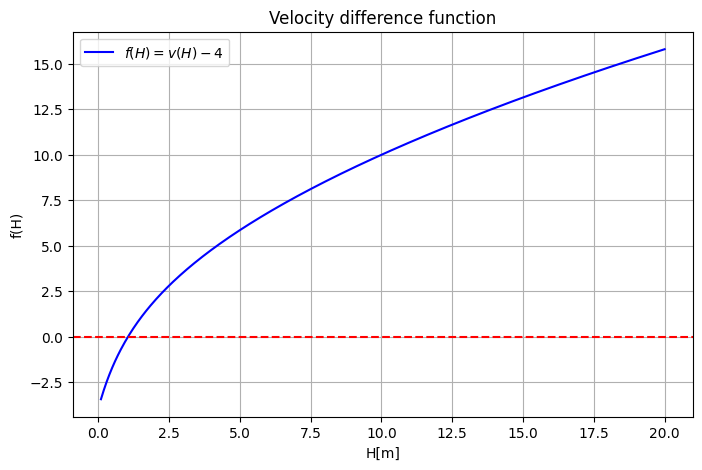

In [31]:
plot_velocity_diff_function()

Bisection method for finding the root of the function
- using formula: $x_{r} = \frac{x_{l} + x_{u}}{2}$
- where $x_{l}$ is the lower bound and $x_{u}$ is the upper bound and $x_{r}$ is the root of the function
- and $\epsilon$ is the tolerance value

In [32]:
def bisection(func, xl, xu, eps=1e-6):
    xr_old = xu
    
    while True:
        xr = (xl + xu) / 2.0
        if np.abs((xr-xr_old)/xr) < eps:
            break
        
        if func(xr) * func(xl) < 0:
            xu = xr
        else:
            xl = xr
        xr_old = xr
        
    return print ("Bisection method Root:", xr)

Find the root of the function using the bisection method 

In [33]:
H_bisection = bisection(velocity_differance,0.1,20)

Bisection method Root: 1.0579614728689193


In [34]:
def find_root_newton():
    H_newton = newton(velocity_differance, 1)
    return  H_newton

Newton-Raphson method for finding the root of the function
- using formula: $x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$
- where $x_{n}$ is the initial guess and $x_{n+1}$ is the root of the function and $f'(x_{n})$ is the derivative of the function
- $\epsilon$ is the tolerance value
- and $max_{iter}$ is the maximum number of iterations

In [35]:
def find_newton_raphson(fx, dfx, x0, max_iter=20):
    x = x0
    for i in range(max_iter):
        func = fx(x)
        deriv = dfx(x)
        
        if np.abs(deriv) < 1e-6:
            break
        x_new = x - func / deriv
    
        if np.abs((x_new - x) / x_new) < 1e-6:
            break
        x = x_new
        
    return print ("Newton-Rapson method Root:", x)


Velocity differance derivative function for Newton-Raphson method 

In [36]:
def velocity_differance_derivative(H):
    return (velocity_function(H, pipe_length, time) - velocity_differance(H)) / (2 * H)

In [37]:
H_newton_raphson = find_root_newton()
sol = find_newton_raphson(velocity_differance,velocity_differance_derivative, H_newton_raphson)

Newton-Rapson method Root: 1.0579620273517079


**Conclusion:**

To find root of velocity function with formula $v = \sqrt{2gh} \tanh(\sqrt{2gh} \frac{t}{2L})$. We used 3 methods graphical, by bisectionn and Newton-Raphson methods. We found that the root of the function is approximately 0.8155 [m].

All methods resulted in the same solution, although with graphical method we don't get direct one. 

